In [102]:
import pandas as pd

In [103]:
import requests

In [104]:
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search'


In [105]:
response = requests.get(url=url, auth=auth)

In [106]:
response

<Response [200]>

In [107]:
import json
data = json.loads(response.text)

In [108]:
data

{'took': 0,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': 1.0,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'zWpMNXcBTeKmGB84ekLH',
    '_score': 1.0,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm25',
     'Value': 20,
     'LocationLat': 45.6568,
     'LocationLong': 25.5917,
     'TimeStamp': 1611506922000,
     'Measurement': 'µg/m3'}},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'z2pMNXcBTeKmGB84ekLI',
    '_score': 1.0,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm25',
     'Value': 20,
     'LocationLat': 45.670103,
     'LocationLong': 25.617966,
     'TimeStamp': 1611506907000,
     'Measurement': 'µg/m3'}},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': '0GpMNXcBTeKmGB84ekLJ',
    '_score': 1.0,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm1',
     'Value': 15,
     'Loc

In [109]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits'])

In [110]:
data['hits']

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': 1.0,
 'hits': [{'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'zWpMNXcBTeKmGB84ekLH',
   '_score': 1.0,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 20,
    'LocationLat': 45.6568,
    'LocationLong': 25.5917,
    'TimeStamp': 1611506922000,
    'Measurement': 'µg/m3'}},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'z2pMNXcBTeKmGB84ekLI',
   '_score': 1.0,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 20,
    'LocationLat': 45.670103,
    'LocationLong': 25.617966,
    'TimeStamp': 1611506907000,
    'Measurement': 'µg/m3'}},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': '0GpMNXcBTeKmGB84ekLJ',
   '_score': 1.0,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm1',
    'Value': 15,
    'LocationLat': 45.653509,
    'LocationLong': 25.56612,
    'TimeStamp': 1611506908000,
    'Measurement': 'µg/m3'}},
  {'_index': 'brasov-dev',
  

In [111]:
data2 = data['hits']

In [112]:
data2.keys()

dict_keys(['total', 'max_score', 'hits'])

In [113]:
data3 = data2['hits']

In [114]:
df = pd.concat(map(pd.DataFrame.from_dict, data3), axis=1)['_source'].T

In [120]:
df

,LocationLat,LocationLong,Measurement,Sensor,Source,TimeStamp,Value
_source,45.6568,25.5917,µg/m3,pm25,UradMonitor,1611506922000,20
_source,45.670103,25.617966,µg/m3,pm25,UradMonitor,1611506907000,20
_source,45.653509,25.56612,µg/m3,pm1,UradMonitor,1611506908000,15
_source,45.6536,25.599,µg/m3,pm10,UradMonitor,1611506893000,16
_source,45.6718,25.6006,µg/m3,pm1,UradMonitor,1586291052000,12
_source,45.589267,25.46445,µg/m3,pm10,UradMonitor,1611506937000,2
_source,45.6718,25.6006,µg/m3,pm25,UradMonitor,1586291052000,21
_source,45.670103,25.617966,µg/m3,pm1,UradMonitor,1611506907000,12
_source,45.653509,25.56612,µg/m3,pm25,UradMonitor,1611506908000,24
_source,45.704032,25.640955,µg/m3,pm1,UradMonitor,1611506918000,14


In [122]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)

        LocationLat LocationLong Measurement Sensor       Source  \
_source     45.6568      25.5917       µg/m3   pm25  UradMonitor   
_source   45.670103    25.617966       µg/m3   pm25  UradMonitor   
_source   45.653509     25.56612       µg/m3    pm1  UradMonitor   
_source     45.6536       25.599       µg/m3   pm10  UradMonitor   
_source     45.6718      25.6006       µg/m3    pm1  UradMonitor   
_source   45.589267     25.46445       µg/m3   pm10  UradMonitor   
_source     45.6718      25.6006       µg/m3   pm25  UradMonitor   
_source   45.670103    25.617966       µg/m3    pm1  UradMonitor   
_source   45.653509     25.56612       µg/m3   pm25  UradMonitor   
_source   45.704032    25.640955       µg/m3    pm1  UradMonitor   

             TimeStamp Value  
_source  1611506922000    20  
_source  1611506907000    20  
_source  1611506908000    15  
_source  1611506893000    16  
_source  1586291052000    12  
_source  1611506937000     2  
_source  1586291052000    21  
_so

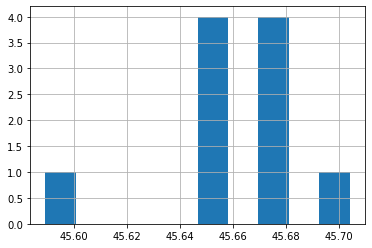

In [116]:
hist = df.get('LocationLat').hist()

In [117]:
df.values

array([[45.6568, 25.5917, 'µg/m3', 'pm25', 'UradMonitor', 1611506922000,
        20],
       [45.670103, 25.617966, 'µg/m3', 'pm25', 'UradMonitor',
        1611506907000, 20],
       [45.653509, 25.56612, 'µg/m3', 'pm1', 'UradMonitor',
        1611506908000, 15],
       [45.6536, 25.599, 'µg/m3', 'pm10', 'UradMonitor', 1611506893000,
        16],
       [45.6718, 25.6006, 'µg/m3', 'pm1', 'UradMonitor', 1586291052000,
        12],
       [45.589267, 25.46445, 'µg/m3', 'pm10', 'UradMonitor',
        1611506937000, 2],
       [45.6718, 25.6006, 'µg/m3', 'pm25', 'UradMonitor', 1586291052000,
        21],
       [45.670103, 25.617966, 'µg/m3', 'pm1', 'UradMonitor',
        1611506907000, 12],
       [45.653509, 25.56612, 'µg/m3', 'pm25', 'UradMonitor',
        1611506908000, 24],
       [45.704032, 25.640955, 'µg/m3', 'pm1', 'UradMonitor',
        1611506918000, 14]], dtype=object)

In [118]:
len(df)

10

In [119]:
df.tail(100)

,LocationLat,LocationLong,Measurement,Sensor,Source,TimeStamp,Value
_source,45.6568,25.5917,µg/m3,pm25,UradMonitor,1611506922000,20
_source,45.670103,25.617966,µg/m3,pm25,UradMonitor,1611506907000,20
_source,45.653509,25.56612,µg/m3,pm1,UradMonitor,1611506908000,15
_source,45.6536,25.599,µg/m3,pm10,UradMonitor,1611506893000,16
_source,45.6718,25.6006,µg/m3,pm1,UradMonitor,1586291052000,12
_source,45.589267,25.46445,µg/m3,pm10,UradMonitor,1611506937000,2
_source,45.6718,25.6006,µg/m3,pm25,UradMonitor,1586291052000,21
_source,45.670103,25.617966,µg/m3,pm1,UradMonitor,1611506907000,12
_source,45.653509,25.56612,µg/m3,pm25,UradMonitor,1611506908000,24
_source,45.704032,25.640955,µg/m3,pm1,UradMonitor,1611506918000,14
